# Exploratory Data Analysis

In [173]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load the data


In [174]:
df = pd.read_parquet('../data/processed/imputed_df.parquet')
df = df.dropna(subset=['target'])

df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,target,OCCUPATION_TYPE,CODE_GENDER,NAME_CONTRACT_TYPE
0,0.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,18.0,20.0,Secondary / secondary special,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,Laborers,M,Cash loans
1,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,6.0,10.0,Higher education,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Core staff,F,Cash loans
2,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,16.0,17.0,Secondary / secondary special,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Laborers,M,Revolving loans
3,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,20.0,16.0,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Laborers,F,Cash loans
4,0.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,16.0,17.0,Secondary / secondary special,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Core staff,M,Cash loans


## Denoising data

Identify columns with potential noise or outliers

In [175]:
outliers = {}
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

sorted_outliers = sorted(outliers.items(), key = lambda x :x[1], reverse = True)
top_outliers_cols = [col for col, count in sorted_outliers if count > 0]
print("Columns with outliers:\n")
for i in range(0, len(top_outliers_cols)):
    print("Column: ", top_outliers_cols[i], "|\tNumber of outliers: ", outliers[top_outliers_cols[i]], "\n")


Columns with outliers:

Column:  REGION_RATING_CLIENT |	Number of outliers:  80525 

Column:  REGION_RATING_CLIENT_W_CITY |	Number of outliers:  78025 

Column:  DAYS_EMPLOYED |	Number of outliers:  72215 

Column:  REG_CITY_NOT_WORK_CITY |	Number of outliers:  70866 

Column:  FLAG_WORK_PHONE |	Number of outliers:  61303 

Column:  FLAG_EMP_PHONE |	Number of outliers:  55385 

Column:  LIVE_CITY_NOT_WORK_CITY |	Number of outliers:  55214 

Column:  NAME_TYPE_SUITE |	Number of outliers:  50618 

Column:  AMT_REQ_CREDIT_BUREAU_QRT |	Number of outliers:  50574 

Column:  AMT_REQ_CREDIT_BUREAU_MON |	Number of outliers:  43758 

Column:  DEF_30_CNT_SOCIAL_CIRCLE |	Number of outliers:  35164 

Column:  NAME_CONTRACT_TYPE_Revolving loans |	Number of outliers:  29274 

Column:  NAME_HOUSING_TYPE |	Number of outliers:  28686 

Column:  FLAG_DOCUMENT_6 |	Number of outliers:  27077 

Column:  DEF_60_CNT_SOCIAL_CIRCLE |	Number of outliers:  25767 

Column:  FLAG_DOCUMENT_8 |	Number of outliers:  

Visualize the 10 columns containing most outliers with box plots

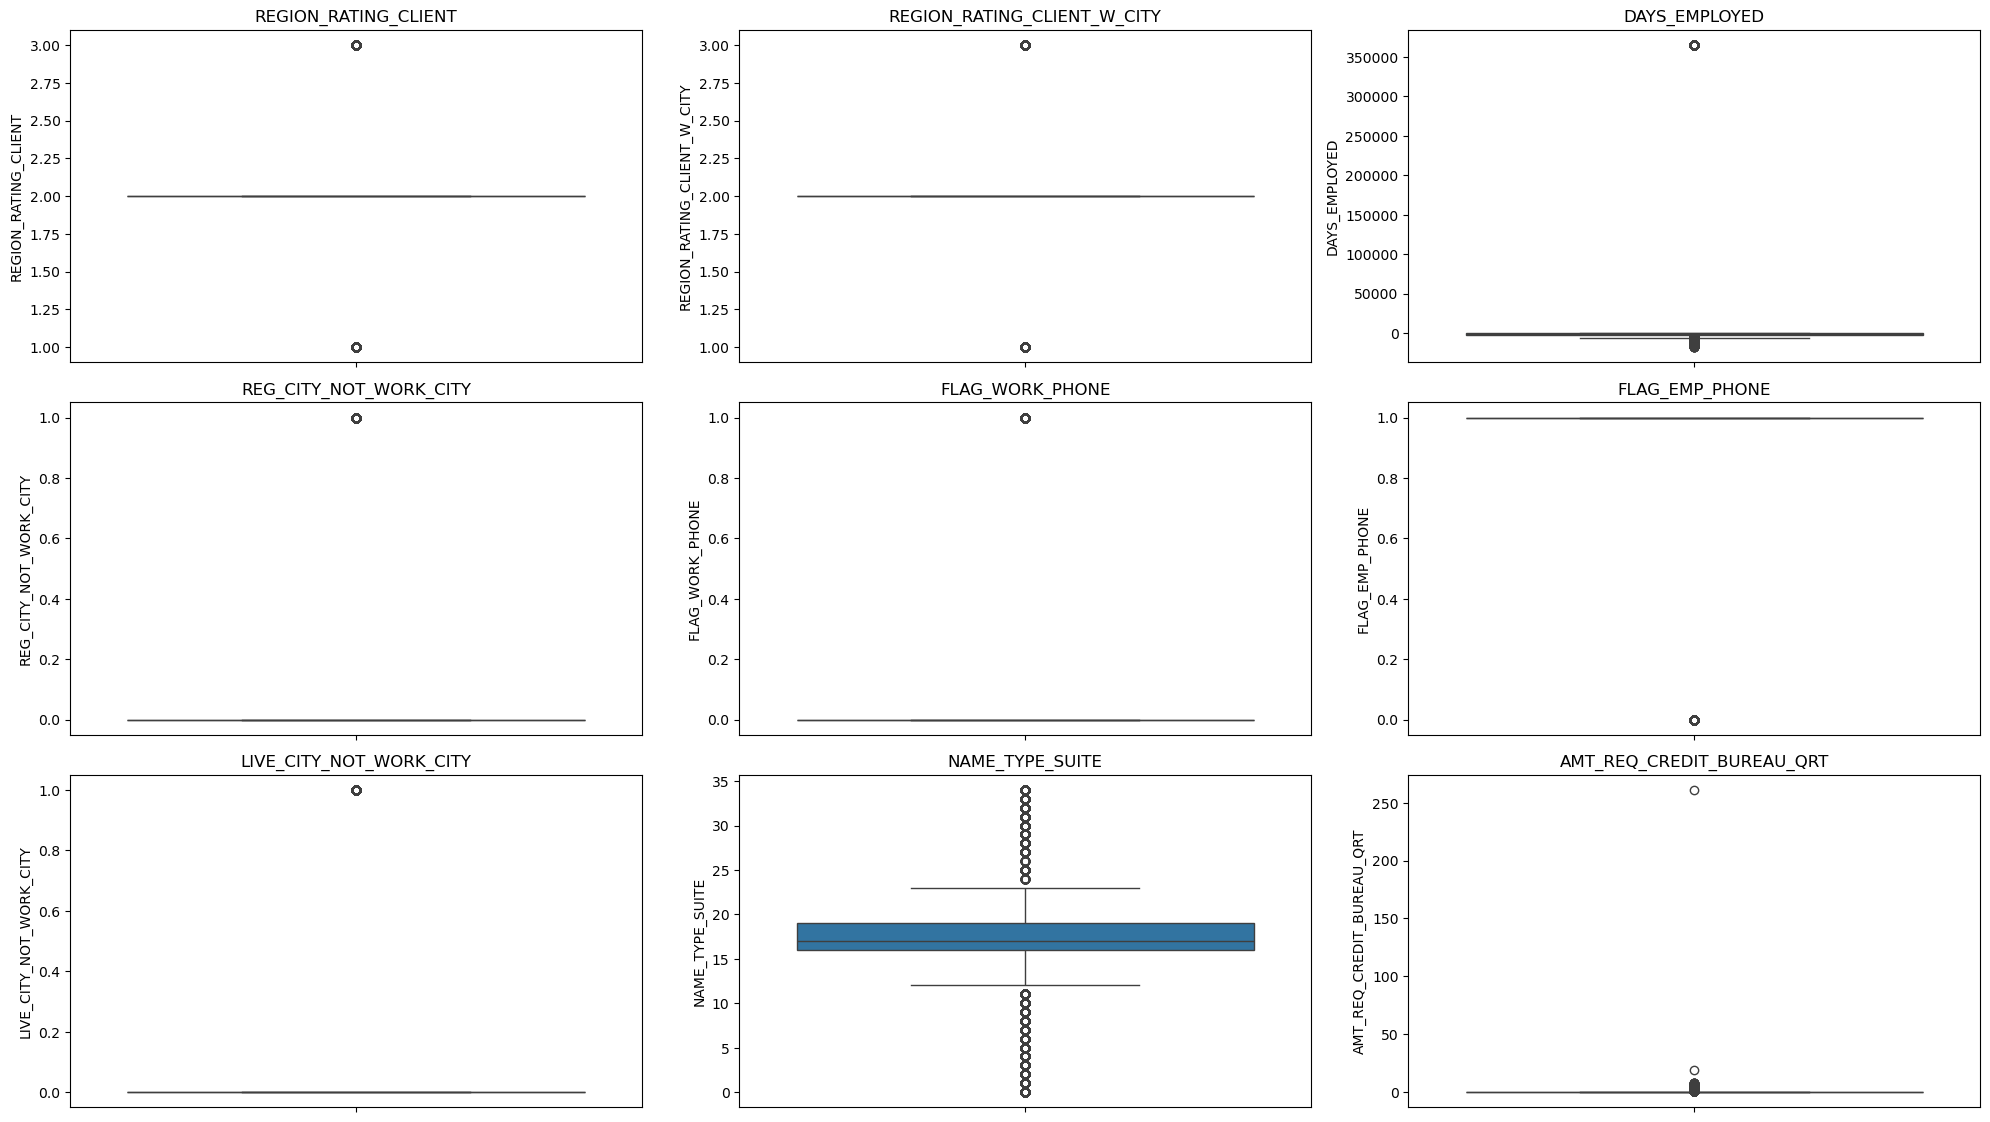

In [176]:
plt.figure(figsize=(20,15))
for i, col in enumerate(top_outliers_cols[:9]):
    plt.subplot(len(top_outliers_cols[:9]) // 3 +1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

Denoise the identified columns replacing the outliers with the median

In [181]:
for col in top_outliers_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

Plot the columns that had most outliers again to make sure that we have denoised them correctly

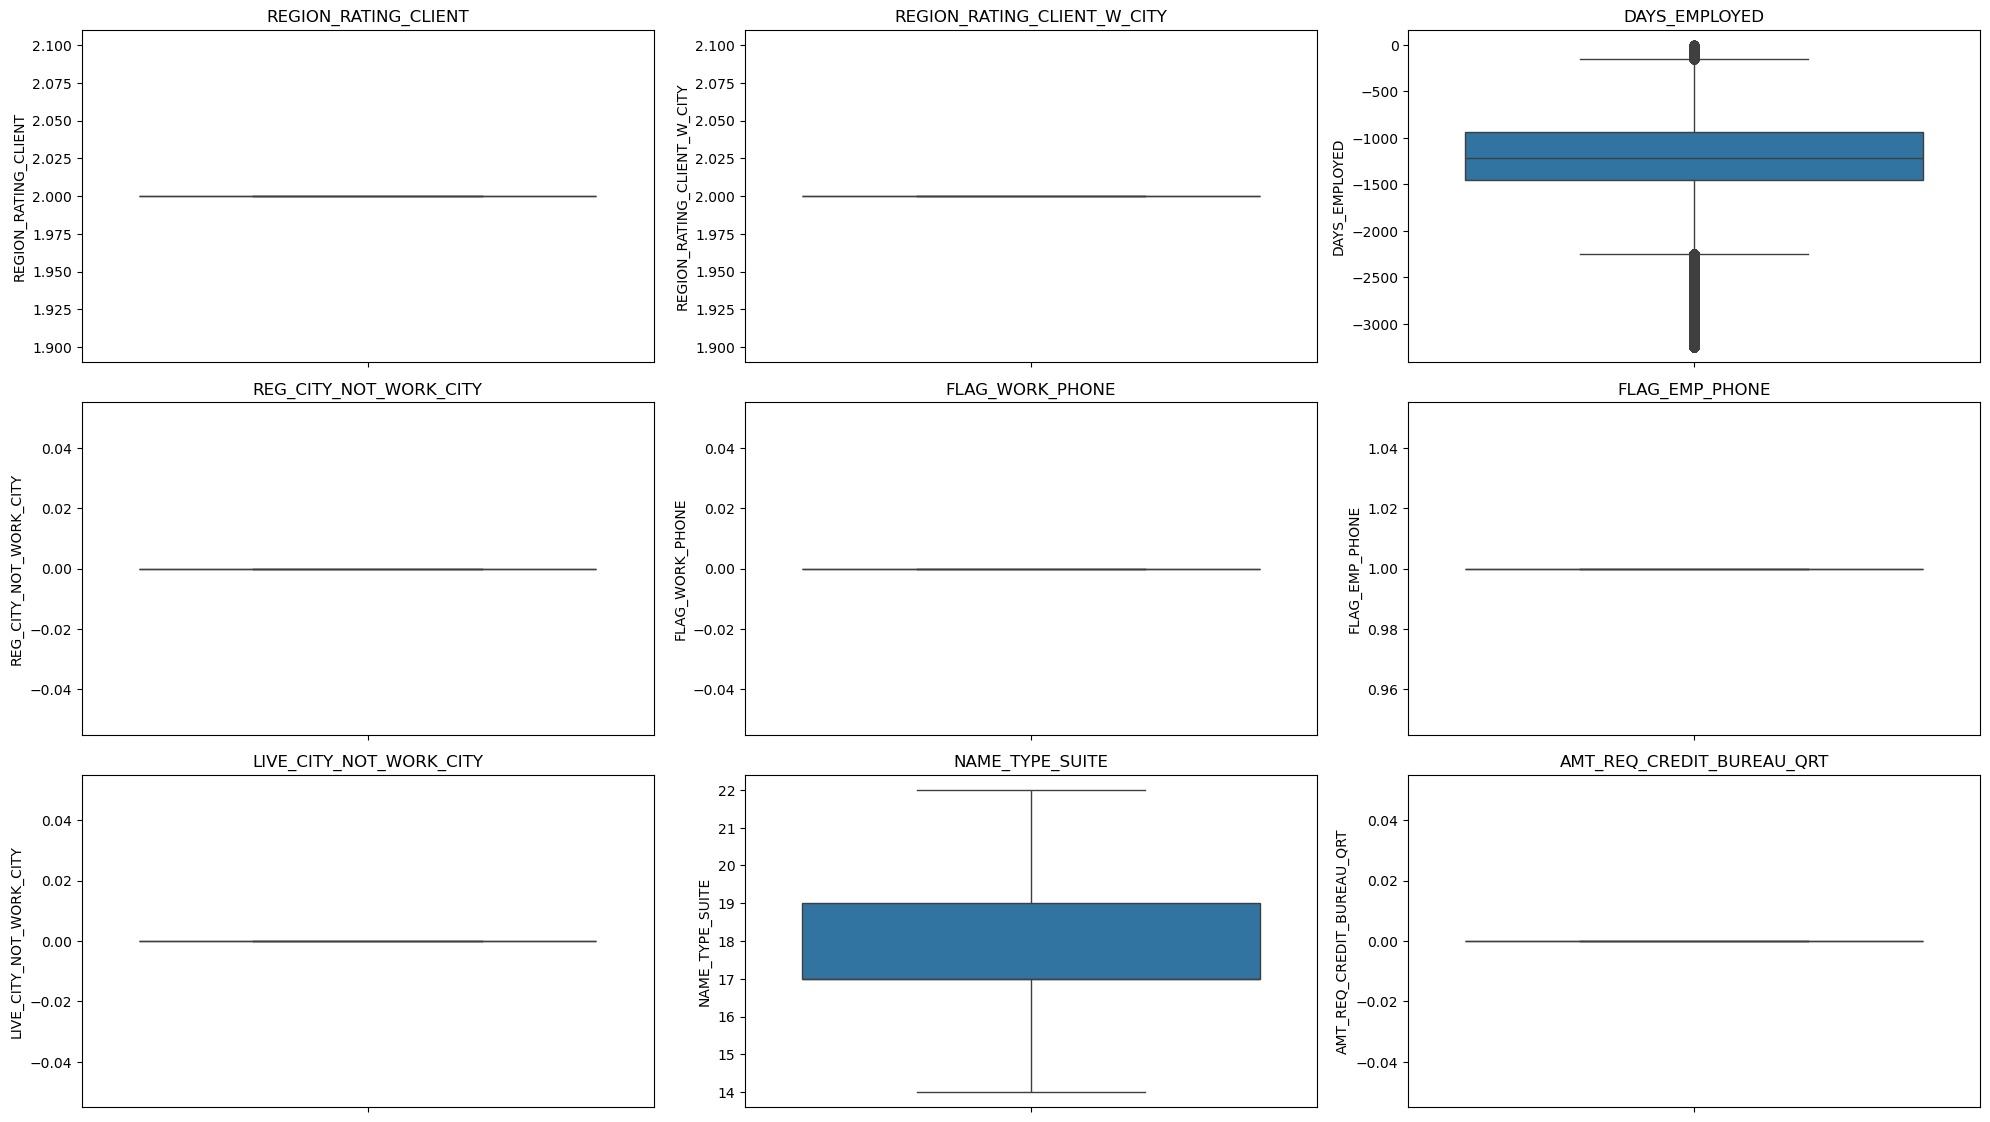

In [182]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(top_outliers_cols[:9]):
    plt.subplot(len(top_outliers_cols[:9]) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()